# 1. Setting up all necessary libraries

In [177]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import  OneHotEncoder
from sklearn.preprocessing import normalize, minmax_scale
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

from catboost import CatBoostRegressor
from catboost import Pool 
import torch

In [178]:
sns.set_style('whitegrid')

In [179]:
data_train = pd.read_csv('train.csv')
data_test  = pd.read_csv('test.csv')
ids = data_test['Id']

In [180]:
data_train.shape

(1460, 81)

In [181]:
data_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [182]:
data_train = data_train.drop('Id', axis=1)

### Let's begin our journey to highest possible raiting through some feature extraction and engineering

In [183]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [184]:
data_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Let's see the distribution of all numerical data

In [185]:
df_cat = data_train.select_dtypes(include = ['object'])

In [186]:
df_num = data_train.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


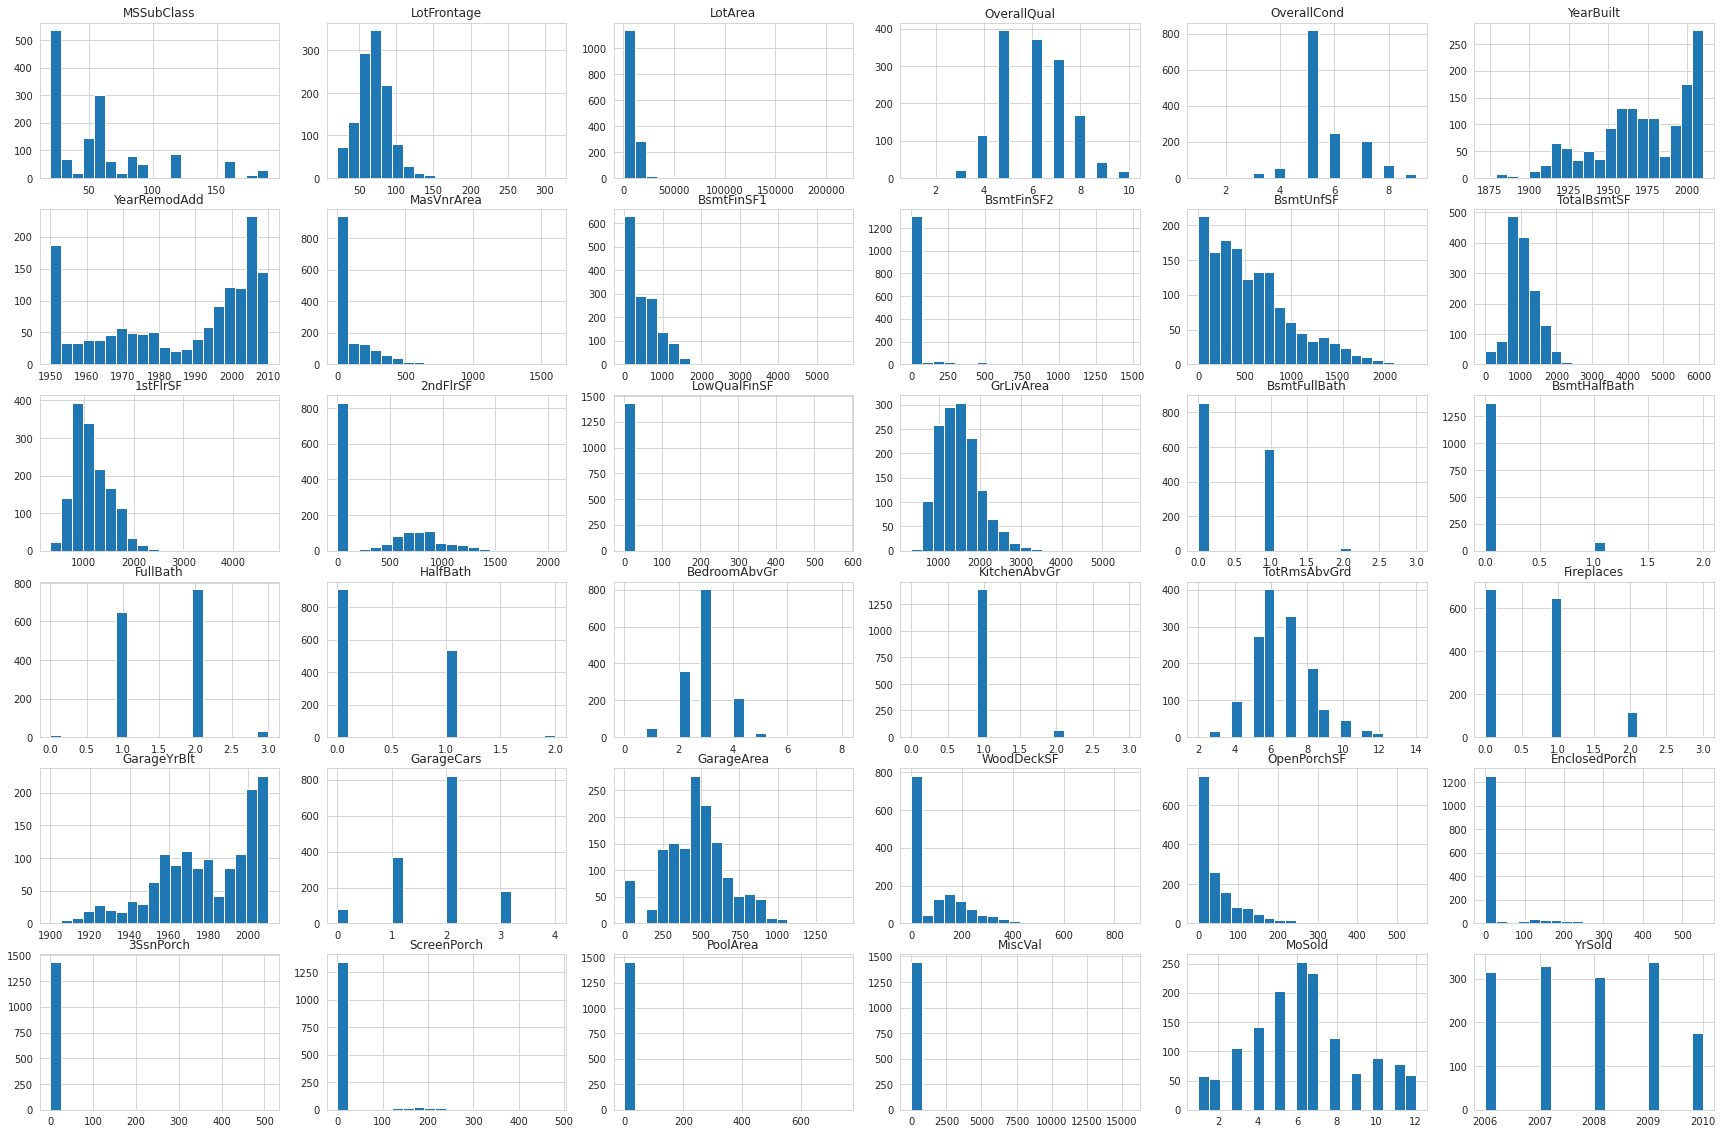

In [187]:
fig, ax = plt.subplots(6, 6, figsize=(30,20))
for i, name in enumerate(df_num.columns[:36]):
    ax[i // 6, i % 6].hist(df_num[name], bins=20)
    ax[i // 6, i % 6].set_title(name)


(array([ 49., 331., 491., 280., 151.,  77.,  34.,  25.,  11.,   3.,   3.,
          1.,   2.,   0.,   2.]),
 array([ 34900.        ,  82906.66666667, 130913.33333333, 178920.        ,
        226926.66666667, 274933.33333333, 322940.        , 370946.66666667,
        418953.33333333, 466960.        , 514966.66666667, 562973.33333333,
        610980.        , 658986.66666667, 706993.33333333, 755000.        ]),
 <BarContainer object of 15 artists>)

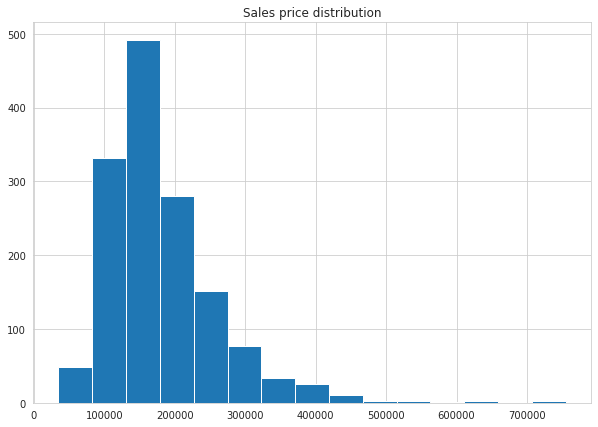

In [188]:
plt.figure(figsize=(10, 7))
plt.title('Sales price distribution')
plt.hist(data_train['SalePrice'], bins=15)

# 2. Encoding of all categorial data

Before proceed to encoding it's necessary to get rid of all NaN data

In [189]:
nan_columns = df_cat.columns[df_cat.isna().any()].tolist()
nan_columns

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [190]:
df_cat['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [191]:
def encode(data, df_cat, nan_columns):
    for column in df_cat.columns:
        headers_of_encoding = df_cat[column].value_counts().index.to_numpy()
        if column in nan_columns:
            array = np.linspace(0, 1, headers_of_encoding.shape[0] + 1)
            for i, code in enumerate(array[1:]):
                data.loc[data[column] == headers_of_encoding[i], column] = code
        else:
            array = np.linspace(0, 1, headers_of_encoding.shape[0])
            for i, code in enumerate(array):
                data.loc[data[column] == headers_of_encoding[i], column] = code
                
encode(data_train, df_cat, nan_columns)

In [192]:
data_train = data_train.fillna(0).astype(float)

In [193]:
data_train['MSSubClass']

0       60.0
1       20.0
2       60.0
3       70.0
4       60.0
        ... 
1455    60.0
1456    20.0
1457    70.0
1458    20.0
1459    20.0
Name: MSSubClass, Length: 1460, dtype: float64

In [194]:
def normalize(data_train):
    data_train['MSSubClass'] = minmax_scale(data_train['MSSubClass'].to_numpy())
    data_train['LotArea'] = minmax_scale(data_train['LotArea'].to_numpy())
    data_train['PoolArea'] = minmax_scale(data_train['PoolArea'].to_numpy())
    data_train['MiscVal'] = minmax_scale(data_train['MiscVal'].to_numpy())

normalize(data_train)

In [195]:
data_train['MSSubClass'].value_counts()

0.000000    536
0.235294    299
0.176471    144
0.588235     87
0.058824     69
0.823529     63
0.294118     60
0.352941     58
0.411765     52
1.000000     30
0.382353     20
0.323529     16
0.147059     12
0.941176     10
0.117647      4
Name: MSSubClass, dtype: int64

In [196]:
data_train.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.217043,0.074658,57.623288,0.043080,0.004110,0.045205,0.136073,0.061872,0.000685,0.104110,...,0.003738,0.002968,0.082363,0.010788,0.002806,6.321918,2007.815753,0.029195,0.062329,180921.195890
std,0.248827,0.167097,34.664304,0.046653,0.063996,0.186075,0.194099,0.202170,0.026171,0.193362,...,0.054441,0.046901,0.195973,0.061496,0.032008,2.703626,1.328095,0.099226,0.153479,79442.502883
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,34900.000000
25%,0.000000,0.000000,42.000000,0.029229,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,0.000000,0.000000,129975.000000
50%,0.176471,0.000000,63.000000,0.038227,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,0.000000,0.000000,163000.000000
75%,0.294118,0.000000,79.000000,0.048150,0.000000,0.000000,0.333333,0.000000,0.000000,0.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,0.000000,0.000000,214000.000000
max,1.000000,1.000000,313.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,2010.000000,1.000000,1.000000,755000.000000


<AxesSubplot:>

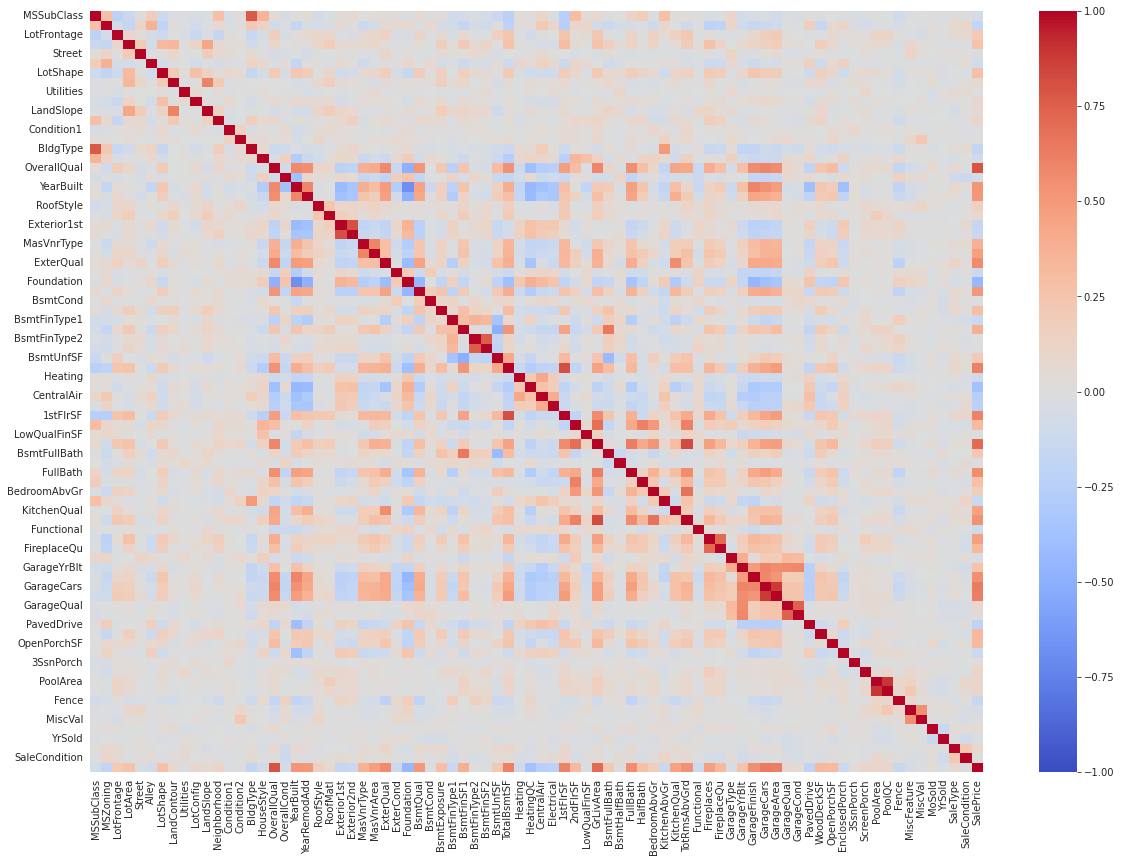

In [197]:
plt.figure(figsize=(20, 14))
sns.heatmap(data_train.corr(), cmap='coolwarm', vmin = -1, vmax = 1)

In [198]:
new_feature1 = data_train['BldgType'] * data_train['MSSubClass']
new_feature2 = data_train['MasVnrType'] * data_train['Exterior1st']
new_feature3 = data_train['PoolArea'] * data_train['Fence']
new_feature4 = data_train['GarageCond'] * data_train['GarageQual']
new_feature5 = data_train['Exterior1st'] * data_train['MasVnrType']

# 3. Linear vs Forest Models

In [89]:
x, y = data_train[data_train.columns[:79]], data_train[data_train.columns[-1]]
model = LinearRegression().fit(x, y)
model.coef_

array([-3.86451843e+04, -2.08047527e+04,  2.92211731e+01, -2.27008266e+04,
        1.55042707e+04, -2.87022123e+04,  7.67339245e+03,  4.46419191e+03,
       -2.30406779e+05,  8.13127342e+02,  2.59377866e+03,  4.06745936e+04,
       -3.17114449e+04, -6.65442658e+04,  6.12711920e+03,  1.92448636e+04,
        1.42563243e+04,  4.12842161e+03,  2.23499887e+01,  1.84960611e+02,
        4.62404400e+04, -1.62014111e+05, -8.94538664e+03,  1.39084003e+04,
       -5.83995969e+04,  5.79168409e+01,  2.17534523e+04, -9.03363939e+03,
       -1.81309164e+04,  4.35054280e+04, -2.94903380e+04,  1.13350896e+04,
       -7.77439202e+03, -7.28327107e+15, -1.14886414e+04, -7.28327107e+15,
       -7.28327107e+15,  7.28327107e+15,  7.23661704e+03, -2.16860999e+04,
       -4.10930932e+03,  5.62899914e+04, -3.16959174e+15, -3.16959174e+15,
       -3.16959174e+15,  3.16959174e+15,  6.08864585e+03,  2.88420126e+03,
        2.52152013e+03, -1.85553715e+03, -4.83319819e+03, -1.83859891e+04,
       -1.20762306e+04,  

/home/matthew/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


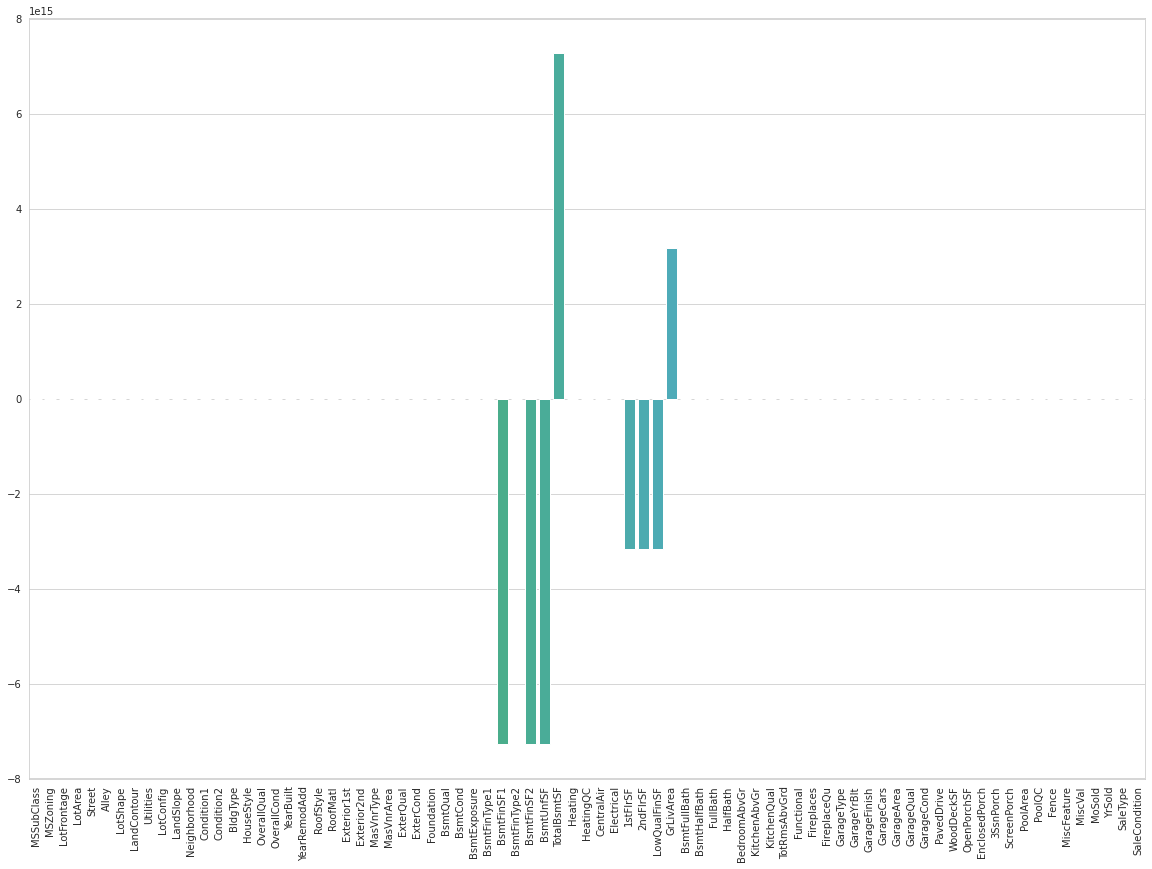

In [90]:
plt.figure(figsize=(20, 14))
sns.barplot(x.columns, model.coef_)
plt.xticks(rotation=90);


In [91]:
x, y = data_train[data_train.columns[:79]], data_train[data_train.columns[-1]]
x['new corr1'] = new_feature1
x['new corr2'] = new_feature2
x['new corr3'] = new_feature3
x['new corr4'] = new_feature4

In [92]:
model = LinearRegression().fit(x, y)
y_ = model.predict(x)

In [93]:
model.coef_

array([-3.56717571e+04,  4.21667901e+03,  7.12390303e+01,  1.00837114e+05,
       -3.20926861e+04,  1.96763205e+04, -1.68023897e+04,  7.25440896e+03,
       -1.75754816e+05,  4.21779501e+03, -2.54849990e+04,  4.89288659e+04,
       -4.11597209e+04, -6.62314839e+04, -1.68879854e+04,  9.10209909e+03,
        1.21916350e+04,  4.38876842e+03,  3.93765233e+02,  8.93493210e+01,
        1.00380420e+04, -7.91663129e+04,  8.57691073e+04, -7.67082918e+03,
        3.24016629e+04,  2.32951524e+01,  1.15158687e+04,  1.08027400e+03,
        1.18034635e+04,  1.62249765e+03, -2.91661485e+04,  1.29208927e+03,
        9.30076548e+03, -3.39327347e+15,  2.39275063e+04, -3.39327347e+15,
       -3.39327347e+15,  3.39327347e+15,  2.14840141e+04, -4.89396837e+03,
       -3.53021325e+04,  2.47355242e+04, -5.79119777e+14, -5.79119777e+14,
       -5.79119777e+14,  5.79119777e+14,  2.86206787e+03, -1.19690496e+04,
        1.06743280e+03, -2.86533173e+03, -7.90946306e+03, -1.79344416e+04,
        3.10504709e+04,  

In [94]:
rmse = mean_squared_error(np.log(abs(y)), np.log(abs(y_)), squared=False)
rmse

0.23766188566417948

In [95]:
model_forest = RandomForestClassifier().fit(x, y)
y__ = model_forest.predict(x)

In [96]:
rmse = mean_squared_error(np.log(abs(y)), np.log(abs(y__)), squared=False)
rmse

0.0

# 4. Gradient Boosting Models Comparison

In [97]:
model = CatBoostRegressor()
model.fit(x, y)

Learning rate set to 0.043466
0:	learn: 77109.9638369	total: 2.79ms	remaining: 2.78s
1:	learn: 75007.3367759	total: 4.05ms	remaining: 2.02s
2:	learn: 73008.3948164	total: 5.64ms	remaining: 1.87s
3:	learn: 71013.7233381	total: 7.08ms	remaining: 1.76s
4:	learn: 69257.4448169	total: 8.41ms	remaining: 1.67s
5:	learn: 67450.5588705	total: 9.84ms	remaining: 1.63s
6:	learn: 65770.0063433	total: 11.3ms	remaining: 1.6s
7:	learn: 64177.4608168	total: 12.9ms	remaining: 1.6s
8:	learn: 62589.7083721	total: 15.2ms	remaining: 1.67s
9:	learn: 61025.5511186	total: 16.9ms	remaining: 1.67s
10:	learn: 59666.8592936	total: 18.1ms	remaining: 1.63s
11:	learn: 58478.9269791	total: 19.5ms	remaining: 1.61s
12:	learn: 57243.9670894	total: 21.1ms	remaining: 1.6s
13:	learn: 55906.8123798	total: 22.5ms	remaining: 1.59s
14:	learn: 54702.1313310	total: 23.8ms	remaining: 1.56s
15:	learn: 53560.0805577	total: 24.8ms	remaining: 1.53s
16:	learn: 52382.3740862	total: 26.7ms	remaining: 1.55s
17:	learn: 51272.5730005	total:

In [98]:
y_ = model.predict(x)

In [99]:
rmse = mean_squared_error(np.log(abs(y)), np.log(abs(y_)), squared=False)
rmse

0.04116499157047246

### Let's compare it to catboost model working on *not encoded* data

In [133]:
data = pd.read_csv('train.csv').drop('Id', axis=1)
data.fillna(0)

df_cat = data.select_dtypes(include = ['object'])

data = data.drop(features_to_drop, axis=1)

cat_features = df_cat.columns.astype(str).to_numpy()

for feature in cat_features:
    data[feature] = data[feature].astype(str)
    
    
shape = data.shape[1]
x, y = data[data.columns[:shape - 1]], data[data.columns[-1]]

#test whether new features give some boost in terms of performance
x['new corr1'] = new_feature1
x['new corr2'] = new_feature2
x['new corr3'] = new_feature3
x['new corr4'] = new_feature4
x['new corr5'] = new_feature5

In [134]:
model = CatBoostRegressor(verbose = False, cat_features=cat_features)
model.fit(x, y)

In [135]:
y_ = model.predict(x)
rmse = mean_squared_error(np.log(abs(y)), np.log(abs(y_)), squared=False)
rmse

0.0670125271657241

only first feature 
0.06844746609228283

only second feature 
0.0679796151871938

only third feature
0.06725051004161231

only fourth feature
0.06774574033374946

only fifth feature 
0.0679796151871938

no features
**0.06613224446467443**

In [39]:
rmse = mean_squared_error(np.log(abs(y)), np.log(abs(y_)), squared=False)
rmse

0.06752921235379694

# 5. Fully-Connected Neural Network

In [104]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
device

device(type='cuda')

In [105]:
model = torch.nn.Sequential(
    torch.nn.Linear(79, 125),
    torch.nn.ReLU(),
    torch.nn.Linear(125, 1),
).to(device)

In [106]:
optimizer = torch.optim.Adam(model.parameters(), lr = 0.1)
loss = torch.nn.MSELoss(reduction='sum')

In [107]:
x, y = data_train[data_train.columns[:79]], data_train[data_train.columns[-1]]

In [108]:
x = torch.from_numpy(x.values).float().to(device)
y = torch.from_numpy(y.values).float().to(device)

In [109]:
n_epochs = 1500
losses = []

for n in range(n_epochs):
    
    model.zero_grad()
    y_ = model(x)
    
    loss_ = loss(torch.log(torch.abs((y))), torch.log(torch.abs(y_)))
    losses.append(loss_.cpu().detach().numpy())
    
    loss_.backward()
    optimizer.step()

/home/matthew/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([1460, 1])) that is different to the input size (torch.Size([1460])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


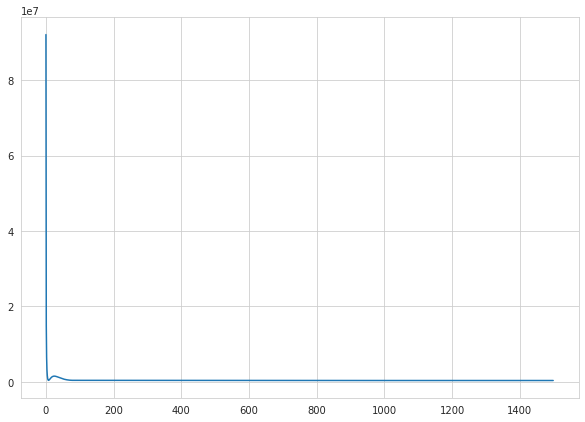

In [110]:
plt.figure(figsize=(10, 7))
plt.plot(losses)

In [111]:
with torch.no_grad():
    output = model(x).detach().cpu().numpy()

| Model | Linear (Naive approach) | Random Forest | Catboost (Naive approach) | Catboost | Neural Network (Naive) | Catboost (feature engineering) | Random Forest (feature engineering) |
|-------|-------------------------|---------------|---------------------------|----------|------------------------|--------------------------------|-------------------------------------|
| RMSE  |  1.52517                       | 0.32299              |    0.15838     |  0.12385 |    0.41462    |                                |                                     |

# 6. Catboost model on normalized and feature engineered data

In [116]:
data_train = pd.read_csv('train.csv')
ids = data_train['Id']
data_train = data_train.drop('Id', axis=1)

df_cat = data_train.select_dtypes(include = ['object'])
cat_features = df_cat.columns.astype(str).to_numpy()

for feature in cat_features:
    data_train[feature] = data_train[feature].astype(str)
    
normalize(data_train)
data_train = data_train.fillna(0)
data_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.235294,RL,65.0,0.033420,Pave,nan,Reg,Lvl,AllPub,Inside,...,0.0,nan,nan,nan,0.00000,2,2008,WD,Normal,208500
1,0.000000,RL,80.0,0.038795,Pave,nan,Reg,Lvl,AllPub,FR2,...,0.0,nan,nan,nan,0.00000,5,2007,WD,Normal,181500
2,0.235294,RL,68.0,0.046507,Pave,nan,IR1,Lvl,AllPub,Inside,...,0.0,nan,nan,nan,0.00000,9,2008,WD,Normal,223500
3,0.294118,RL,60.0,0.038561,Pave,nan,IR1,Lvl,AllPub,Corner,...,0.0,nan,nan,nan,0.00000,2,2006,WD,Abnorml,140000
4,0.235294,RL,84.0,0.060576,Pave,nan,IR1,Lvl,AllPub,FR2,...,0.0,nan,nan,nan,0.00000,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.235294,RL,62.0,0.030929,Pave,nan,Reg,Lvl,AllPub,Inside,...,0.0,nan,nan,nan,0.00000,8,2007,WD,Normal,175000
1456,0.000000,RL,85.0,0.055505,Pave,nan,Reg,Lvl,AllPub,Inside,...,0.0,nan,MnPrv,nan,0.00000,2,2010,WD,Normal,210000
1457,0.294118,RL,66.0,0.036187,Pave,nan,Reg,Lvl,AllPub,Inside,...,0.0,nan,GdPrv,Shed,0.16129,5,2010,WD,Normal,266500
1458,0.000000,RL,68.0,0.039342,Pave,nan,Reg,Lvl,AllPub,Inside,...,0.0,nan,nan,nan,0.00000,4,2010,WD,Normal,142125


In [117]:
x, y = data[data.columns[:79]], data[data.columns[-1]]

In [118]:
model = CatBoostRegressor(verbose = False, cat_features=cat_features)
model.fit(x, y)

In [119]:
y_ = model.predict(x)

In [120]:
rmse = mean_squared_error(np.log(abs(y)), np.log(abs(y_)), squared=False)
rmse

0.06613224446467443

# 7. Final model evaluation and results submission

In [199]:
#For catboost

df_cat = data_test.select_dtypes(include = ['object'])
cat_features = df_cat.columns.astype(str).to_numpy()

for feature in cat_features:
    data_test[feature] = data_test[feature].astype(str)
    
data_test = data_test.fillna(0)
data_test

data_test = data_test.drop(features_to_drop, axis=1)

data_test['new_feature1'] = data_test['BldgType']    * data_test['MSSubClass']
data_test['new_feature2'] = data_test['MasVnrType']  * data_test['Exterior1st']
data_test['new_feature3'] = data_test['PoolArea']    * data_test['Fence']
data_test['new_feature4'] = data_test['GarageCond']  * data_test['GarageQual']
data_test['new_feature5'] = data_test['Exterior1st'] * data_test['MasVnrType']

TypeError: can't multiply sequence by non-int of type 'str'

In [127]:
#For catboost
prices = model.predict(data_test)
data_output = pd.DataFrame({'Id' : [], 'SalePrice' : []})

data_output['Id'] = ids
data_output['SalePrice'] = abs(prices)

data_output.to_csv('submission.csv', index=False)

CatBoostError: catboost/libs/data/model_dataset_compatibility.cpp:72: Feature SalePrice is present in model but not in pool.

ideas:

+ to try to create a brand new features 
+ to compare models with OneHotEnconding to my ordinary mode
+ to add some 

### Sources of inspiration 
1. https://www.kaggle.com/code/aideesis/advanced-regression-for-house-prices
2. https://www.kaggle.com/code/anasselayady/house-prices-full-machine-learning-project
3. https://www.kaggle.com/code/allunia/house-prices-tutorial-with-catboost
4. https://www.kaggle.com/code/allunia/house-prices-tutorial-with-catboost